## Importing Packages

In [19]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation
from keras import backend as K
from keras.preprocessing import image
from keras.models import Model
# import timeit

import warnings
warnings.filterwarnings('ignore')

## Preparing Dataset

In [21]:
batch_size = 128
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
xtrain = x_train.astype('float32')
xtest = x_test.astype('float32')

# normalizing the data to help with the training
x_train = x_train / 255
x_test = x_test / 255

# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [22]:
print(np.unique(y_train, return_counts=True))

(array([0., 1.], dtype=float32), array([540000,  60000], dtype=int64))


## Building a Model 

In [24]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

## Model Vizualization 

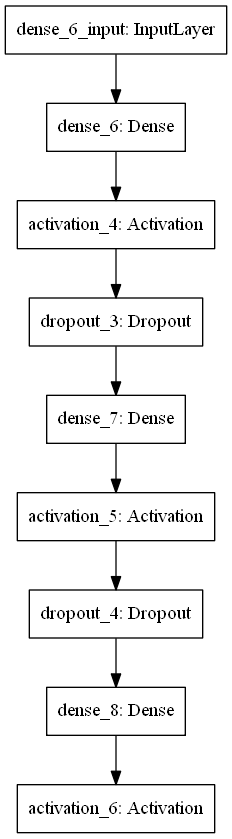

In [25]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [26]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [27]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 120us/step - loss: 0.2481 - accuracy: 0.9263 - val_loss: 0.1138 - val_accuracy: 0.9647
Epoch 2/4
60000/60000 [==============================] - 7s 117us/step - loss: 0.1031 - accuracy: 0.9689 - val_loss: 0.0862 - val_accuracy: 0.9718
Epoch 3/4
60000/60000 [==============================] - 8s 126us/step - loss: 0.0714 - accuracy: 0.9778 - val_loss: 0.0705 - val_accuracy: 0.9779
Epoch 4/4
60000/60000 [==============================] - 7s 121us/step - loss: 0.0544 - accuracy: 0.9827 - val_loss: 0.0688 - val_accuracy: 0.9793


# Testing

In [29]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 37us/step
Test loss: 0.06878171542371857
Test accuracy: 0.9793000221252441


## Prediction

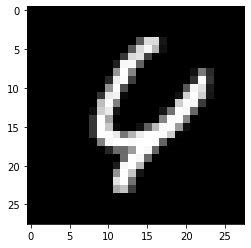

In [31]:
import pylab as plt

plt.imshow(x_test[121].reshape(28,28),cmap='gray')
plt.show()

In [32]:
import numpy as np
prediction = model.predict(x_test[121:122])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [2.3949887e-04 1.4208085e-05 5.0276675e-04 2.5178753e-05 9.8756379e-01
 1.2415492e-04 2.5976887e-03 4.6510540e-04 1.3234055e-03 7.1441112e-03]

Thresholded Score:
 [0 0 0 0 1 0 0 0 0 0]

Predicted Digit:
 4
